### Using SVM to Predict Purchase Intention of E-Commerce Users

In [2]:
# Python Language Version
from platform import python_version
print('Python Language Version Used in This Jupyter Notebook:', python_version())

Python Language Version Used in This Jupyter Notebook: 3.9.7


Problem Definition:

In this Mini-Project, our work will be to evaluate which attributes influence a user to purchase products online and build a predictive model to make predictions of future purchases.

We will use the dataset as a data source:

Online Shoppers Purchasing Intention Dataset

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

The dataset consists of feature vectors belonging to 12,330 online sessions. The dataset was formed so that each session belongs to a different user over a period of 1 year to avoid any bias towards a specific campaign, special day, user, profile or period.

The dataset consists of 10 numeric and 8 categorical attributes. The attribute 'Revenue' can be used as the class label.

## Importing libraries

In [3]:
# Imports
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')

## Load and Data Dictionary

In [4]:
# Carregando os dados
df_original = pd.read_csv('data/online_shoppers_intention.csv')
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Data Dictionary:

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and the total time spent on each of these page categories. The values for these features are derived from the URL information of the pages visited by the user and updated in real-time when a user performs an action, for example by moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page on the e-commerce site. 

The "Bounce Rate" feature value for a web page refers to the percentage of visitors who enter the site from that page and leave ("bounce") without triggering further requests to the server during that session. 

The "Exit Rate" resource value for a specific web page is calculated as the percentage that was last in the session, for all page-to-page views. 

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the proximity of the website visit time to a specific special day (e.g. Mother's Day, Valentine's Day) when sessions are more likely to be finished with a transaction. The value of this attribute is determined by considering the dynamics of e-commerce, such as the duration between the order date and the delivery date. For example, on Valentine's Day, this value takes on a non-zero value between February 2 and February 12 (Valentine's Day in the US and Europe), zero before and after that date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes the type of operating system, browser, region, traffic type, visitor type as new or recurring visitor, a boolean value indicating whether the date of the visit is weekend and month of the year.

The target variable (Revenue) is boolean, with True if the session generated revenue and False if it did not.

## Exploratory Analysis

In [5]:
# Shape
df_original.shape

(12330, 18)

In [6]:
# Data Types
df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
# Checking missing values
print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [8]:
# Removing the rows with missing values
df_original.dropna(inplace = True)

In [9]:
# Checking missing values
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [10]:
# Shape
df_original.shape

(12316, 18)

In [11]:
# Checking Unique Values
df_original.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

For visualization purposes, we will divide the data into continuous and categorical variables. We will treat all variables with less than 30 unique entries as categorical.

In [12]:
# Prepare the data for the plot

# Create a copy of the original dataset
df = df_original.copy()

# Empty lists for the results
continuous = []
categorical = []

# Loop through the columns
for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)

In [13]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [14]:
# Continuous variables
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [15]:
# Categorical variables
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


Graphs for numerical variables.

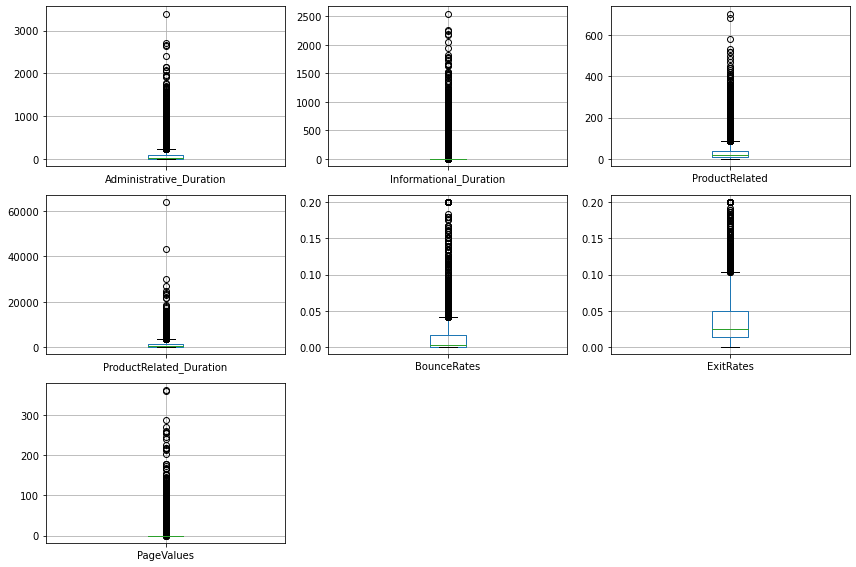

In [16]:
# Plot of continuous variables

# Size of the plotting area
fig = plt.figure(figsize = (12,8))

# Loop through continuous variables
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()
    
plt.savefig('images/boxplot1.png')

Continuous variables look extremely distorted. Let's apply log transformation for better visualization.

In [17]:
# Log transformation of continuous variables
df[continuous] = np.log1p(1 + df[continuous])

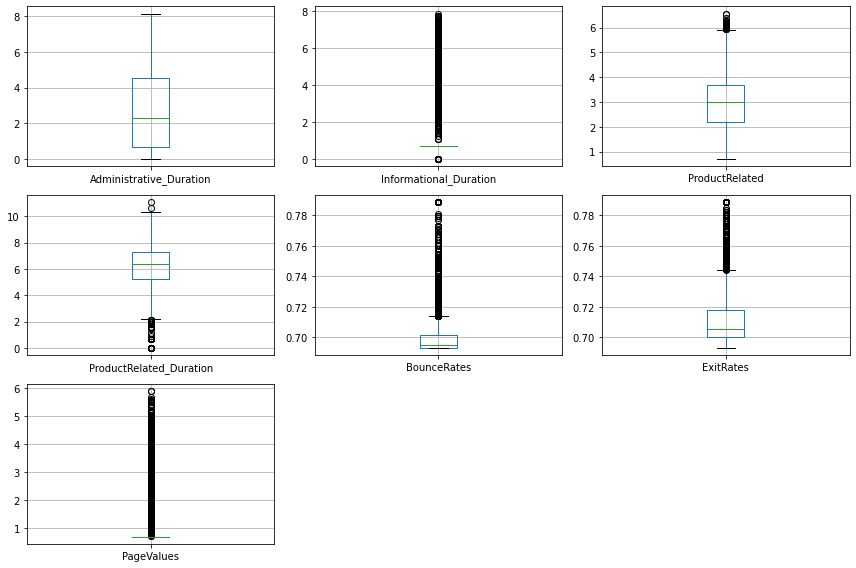

In [18]:
# Plot of continuous variables

# Size of the plotting area
fig = plt.figure(figsize = (12,8))

# Loop through continuous variables
for i,col in enumerate(continuous):
    plt.subplot(3,3,i+1);
    df.boxplot(col);
    plt.tight_layout()
plt.savefig('images/boxplot2.png')

Correlation Matrix Between Continuous Variables.

<AxesSubplot:>

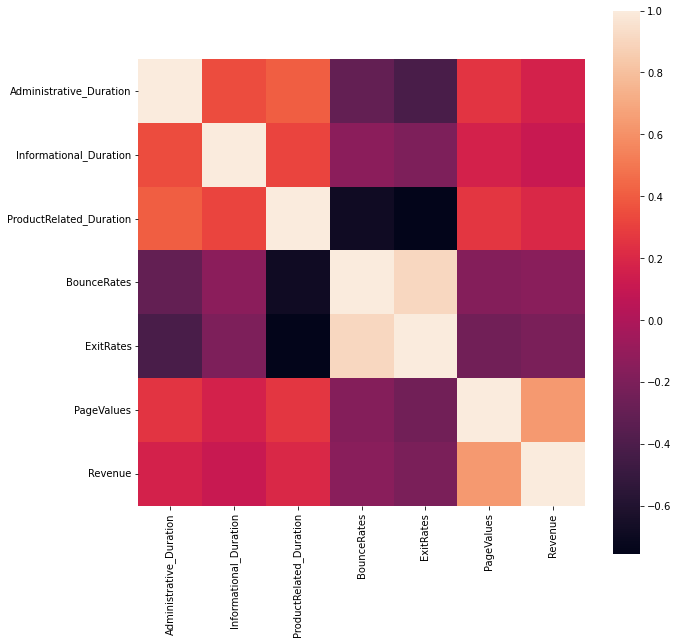

In [19]:
# Plotting area
plt.figure(figsize = (10,10))

# Correlation Matrix 
sns.heatmap(df[['Administrative_Duration',
                'Informational_Duration',  
                'ProductRelated_Duration',
                'BounceRates', 
                'ExitRates', 
                'PageValues',
                'Revenue']].corr(), vmax = 1., square = True)

View graphs of categorical variables to analyze how the target variable is influenced by them.

<AxesSubplot:title={'center':'Sale or Not'}, xlabel='Revenue', ylabel='count'>

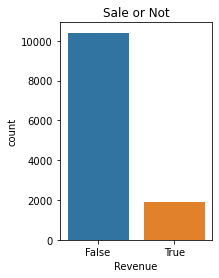

In [20]:
# Countplot Sale or Not
plt.subplot(1,2,2)
plt.title("Sale or Not")
sns.countplot(df['Revenue'])

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

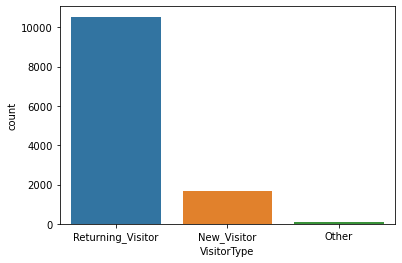

In [21]:
# Countplot Visitor Type
plt.xlabel("Visitor Type")
sns.countplot(df['VisitorType'])

<AxesSubplot:xlabel='VisitorType'>

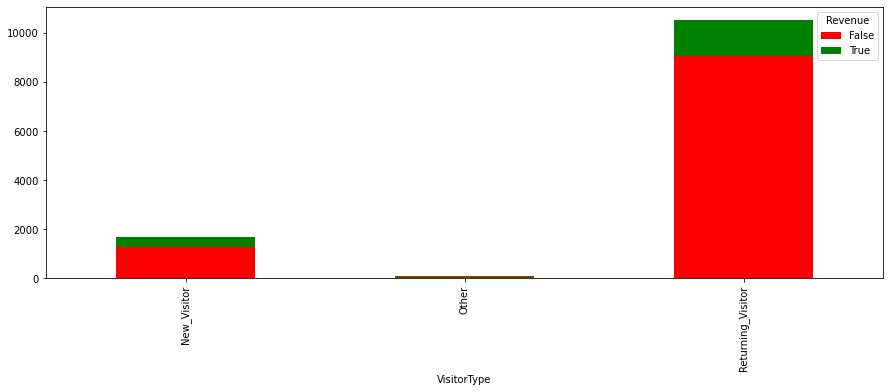

In [22]:
# Stacked Bar Visitor Type x Revenue
pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green'])

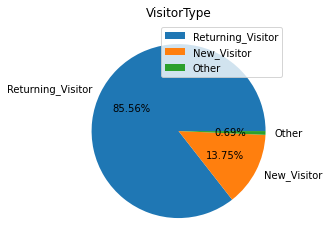

In [23]:
# Pie Chart Visitor Types
labels = ['Returning_Visitor', 'New_Visitor', 'Other']
plt.title("VisitorType")
plt.pie(df['VisitorType'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()

<AxesSubplot:title={'center':'Weekend or Not'}, xlabel='Weekend', ylabel='count'>

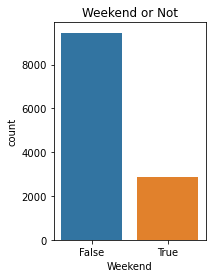

In [24]:
# Countplot Weekend or Not
plt.subplot(1,2,1)
plt.title("Weekend or Not")
sns.countplot(df['Weekend'])

<AxesSubplot:xlabel='Weekend'>

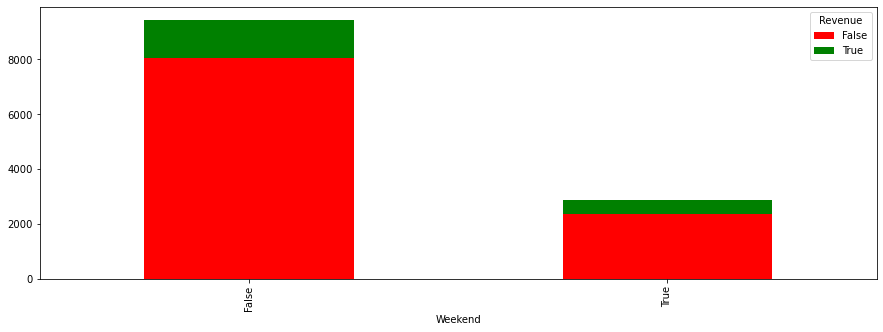

In [25]:
# Stacked Bar Weekend x Revenue
pd.crosstab(df['Weekend'], df['Revenue']).plot(kind = 'bar', 
                                               stacked = True, 
                                               figsize = (15, 5), 
                                               color = ['red', 'green'])

<AxesSubplot:title={'center':'Types of Operating Systems'}, xlabel='OperatingSystems', ylabel='count'>

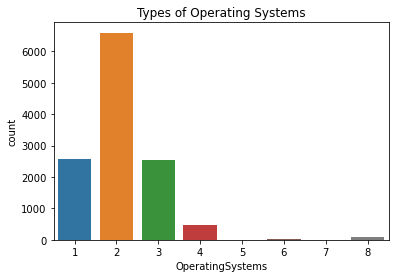

In [26]:
# Countplot Types of Operating Systems
#plt.figure(figsize = (15,6))
plt.title("Types of Operating Systems")
plt.xlabel("Operating System Used")
sns.countplot(df['OperatingSystems'])

<AxesSubplot:xlabel='OperatingSystems'>

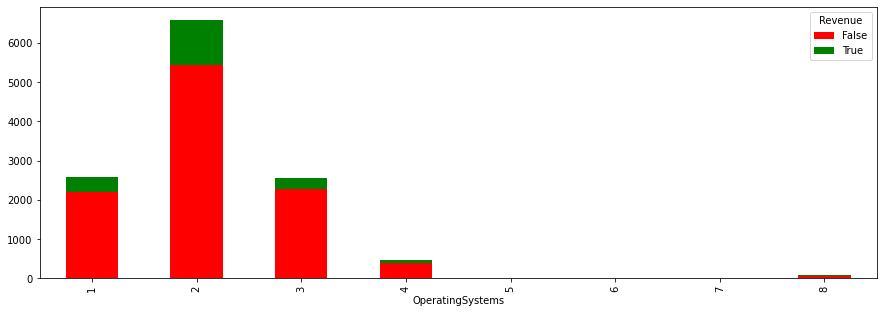

In [27]:
# Stacked Bar Type of OS x Revenue
pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind = 'bar', 
                                                        stacked = True, 
                                                        figsize = (15, 5), 
                                                        color = ['red', 'green'])

<AxesSubplot:title={'center':'Traffic Types'}, xlabel='TrafficType', ylabel='count'>

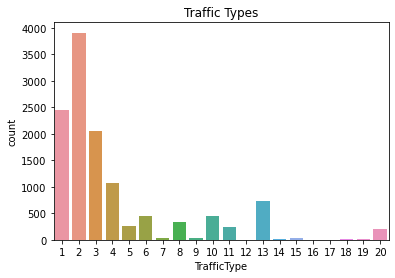

In [28]:
# Countplot Traffic Type
plt.title("Traffic Types")
plt.xlabel("Traffic Type")
sns.countplot(df['TrafficType'])

<AxesSubplot:xlabel='TrafficType'>

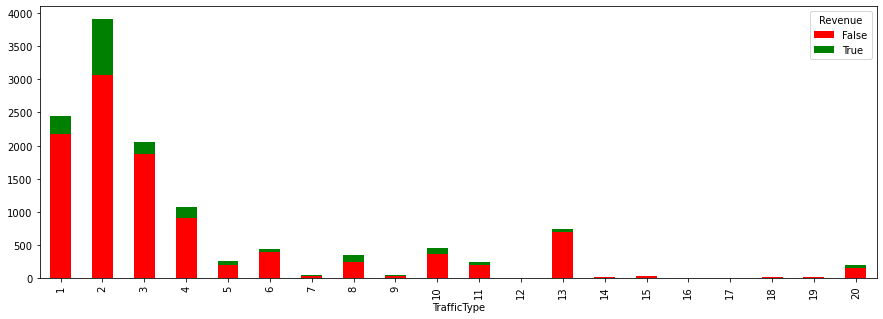

In [29]:
# Stacked Bar Types of Traffic x Revenue
pd.crosstab(df['TrafficType'], df['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green'])

## Data Pre-Processing

In [30]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [31]:
# Create the encoder
lb = LabelEncoder()

# Applies the encoder to the variables that are with string
df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

# Removes missing values that may have been generated
df_original.dropna(inplace = True)

In [32]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [33]:
# Shape
df_original.shape

(12316, 18)

In [34]:
# Checking if the response variable is balanced
target_count = df_original.Revenue.value_counts()
target_count

False    10408
True      1908
Name: Revenue, dtype: int64

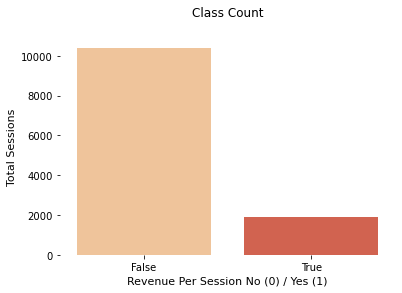

In [35]:
# Plot 
sns.countplot(df_original.Revenue, palette = "OrRd")
plt.box(False)
plt.xlabel('Revenue Per Session No (0) / Yes (1)', fontsize = 11)
plt.ylabel('Total Sessions', fontsize = 11)
plt.title('Class Count\n')
plt.show()

In [1]:
# Install and import the imblearn library
#!pip install -q imblearn
import imblearn

In [36]:
# Shape
df_original.shape

(12316, 18)

In [37]:
# Explanatory variables
df_original.iloc[:, 0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [38]:
# Target Variable
df_original.iloc[:, 17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

Class Balancing - Oversampling

In [39]:
# Import the function
from imblearn.over_sampling import SMOTE

# Seed to reproduce the same result
seed = 100

# Separate X and y
X = df_original.iloc[:, 0:17]  
y = df_original.iloc[:, 17] 

# Create the balancer SMOTE
smote_bal = SMOTE(random_state = seed)

# Apply the balancer
X_res, y_res = smote_bal.fit_resample(X, y)

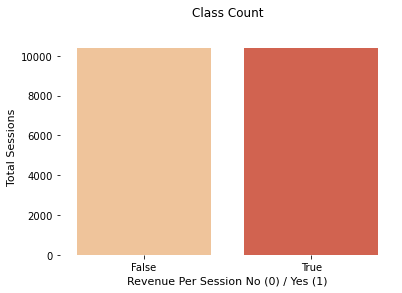

In [40]:
# Plot 
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Revenue Per Session No (0) / Yes (1)', fontsize = 11)
plt.ylabel('Total Sessions', fontsize = 11)
plt.title('Class Count\n')
plt.show()

In [41]:
# Shape of the original data
df_original.shape

(12316, 18)

In [42]:
# Shape of the resampled data 
X_res.shape

(20816, 17)

In [43]:
# Shape of the resampled data 
y_res.shape

(20816,)

In [44]:
# Adjusting X and y
X = X_res
y = y_res

In [46]:
# Division into Training and Test Data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## SVM Model

### Base Model with Linear Kernel

In [47]:
# Create the model
model_v1 = svm.SVC(kernel = 'linear')

In [48]:
# Training
start = time.time()
model_v1.fit(X_train, y_train)
end = time.time()
print('Model Training Time:', end - start)

Model Training Time: 5432.648113012314


In [49]:
# Forecast
forecast_v1 = model_v1.predict(X_teste)

In [68]:
# Metrics and metadata dictionary
SVM_dict_v1 = {'Model':'SVM',
               'Version':'1',
               'Kernel':'Linear',
               'Precision':precision_score(forecast_v1, y_test),
               'Recall':recall_score(forecast_v1, y_test),
               'F1 Score':f1_score(forecast_v1, y_test),
               'Accuracy':accuracy_score(forecast_v1, y_test),
               'AUC':roc_auc_score(y_test, forecast_v1)}

In [69]:
# Print
print("Metrics in Testing:\n")
SVM_dict_v1

Metrics in Testing:



{'Model': 'SVM',
 'Version': '1',
 'Kernel': 'Linear',
 'Precision': 0.8688212927756654,
 'Recall': 0.7895191477109128,
 'F1 Score': 0.8272740986574144,
 'Accuracy': 0.8166533226581265,
 'AUC': 0.8160875644843042}

### Model with Linear Kernel and Standardized (Scaled) Data

In [53]:
# Apply standardization in training and testing
# Standardization
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [54]:
X_train_scaled

array([[ 0.67023596,  0.00746589, -0.4556655 , ..., -0.50179946,
         0.54253778, -0.69426044],
       [-0.71405441, -0.53155654, -0.4556655 , ..., -0.77161458,
         0.54253778,  1.44038165],
       [ 0.9117153 , -0.18078072, -0.4556655 , ...,  0.57746102,
         0.54253778,  1.44038165],
       ...,
       [-0.21784301,  0.00977669,  1.83111142, ..., -0.50179946,
         0.54253778, -0.69426044],
       [-0.80989566, -0.53903796, -0.4556655 , ..., -0.50179946,
        -2.06175081, -0.69426044],
       [-0.37088559, -0.29288262,  0.58272764, ..., -0.50179946,
        -0.75960651, -0.69426044]])

In [55]:
X_test_scaled

array([[-0.74974984, -0.52847418, -0.4556655 , ...,  0.57746102,
        -2.06175081,  1.44038165],
       [-0.80989566, -0.53903796, -0.4556655 , ..., -0.77161458,
         0.54253778,  1.44038165],
       [-0.80989566, -0.53903796, -0.4556655 , ..., -0.77161458,
         0.54253778,  1.44038165],
       ...,
       [-0.80989566, -0.53903796, -0.4556655 , ...,  0.57746102,
         0.54253778, -0.69426044],
       [ 1.03373541,  1.74922518, -0.4556655 , ..., -0.50179946,
         0.54253778,  1.44038165],
       [ 0.3044991 , -0.28747987,  1.09682136, ..., -0.50179946,
         0.54253778, -0.69426044]])

In [56]:
# Create the model
model_v2 = svm.SVC(kernel = 'linear')

In [57]:
# Training
start = time.time()
model_v2.fit(X_train_scaled, y_train)
end = time.time()
print('Model Training Time:', end - start)

Model Training Time: 9.558880090713501


In [58]:
# Forecast
forecast_v2 = model_v2.predict(X_test_scaled)

In [66]:
# Metrics and metadata dictionary
SVM_dict_v2 = {'Model':'SVM',
               'Version':'2',
               'Kernel':'Linear with Standardized Data',
               'Precision':precision_score(forecast_v2, y_test),
               'Recall':recall_score(forecast_v2, y_test),
               'F1 Score':f1_score(forecast_v2, y_test),
               'Accuracy':accuracy_score(forecast_v2, y_test),
               'AUC':roc_auc_score(y_test, forecast_v2)}

In [67]:
# Print
print("Metrics in Testing:\n")
SVM_dict_v2

Metrics in Testing:



{'Model': 'SVM',
 'Version': '2',
 'Kernel': 'Linear with Standardized Data',
 'Precision': 0.7896070975918885,
 'Recall': 0.8909545942080801,
 'F1 Score': 0.8372249286074249,
 'Accuracy': 0.844835868694956,
 'AUC': 0.8454348210523379}

### Hyperparameter Optimization with Grid Search and RBF Kernel

In [61]:
# Create the model
model_v3 = svm.SVC(kernel = 'rbf')

# Values for the grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Hyperparameter Grid
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
model_v3_grid_search_rbf = GridSearchCV(model_v3, svm_param_grid, cv = 3)

# Training
model_v3_grid_search_rbf.fit(X_train_scaled, y_train)
end = time.time()
print('Model Training Time with Grid Search:', end - start)

# Training Accuracy
print(f" Training Accuracy: {model_v3_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Ideal Hyperparameters: {model_v3_grid_search_rbf.best_params_}")

Model Training Time with Grid Search: 137.10413670539856
 Training Accuracy: 87.41%

Ideal Hyperparameters: {'C': 200.0, 'gamma': 0.003}


In [62]:
# Forecast
forecast_v3 = model_v3_grid_search_rbf.predict(X_test_scaled)

In [63]:
# Metrics and metadata dictionary
SVM_dict_v3 = {'Model':'SVM',
               'Version':'3',
               'Kernel':'RBF with Standardized Data',
               'Precision':precision_score(forecast_v3, y_test),
               'Recall':recall_score(forecast_v3, y_test),
               'F1 Score':f1_score(forecast_v3, y_test),
               'Accuracy':accuracy_score(forecast_v3, y_test),
               'AUC':roc_auc_score(y_test, forecast_v3)}

In [70]:
# Print
print("Metrics in Testing:\n")
SVM_dict_v3

Metrics in Testing:



{'Model': 'SVM',
 'Version': '3',
 'Kernel': 'RBF with Standardized Data',
 'Precision': 0.8361850443599493,
 'Recall': 0.8957909029192125,
 'F1 Score': 0.8649623074401837,
 'Accuracy': 0.8680544435548438,
 'AUC': 0.8684000650741152}

### Hyperparameter Optimization with Grid Search and Polynomial Kernel

In [71]:
# Create the model
model_v4 = svm.SVC(kernel = 'poly')

# Grid values
r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

# Hyperparameter Grid
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search
start = time.time()
model_v4_grid_search_poly = GridSearchCV(model_v4, param_grid_poly, cv = 3)

# Training
model_v4_grid_search_poly.fit(X_train_scaled, y_train)
end = time.time()
print('Model Training Time with Grid Search:', end - start)

# Training Accuracy
print(f"Training Accuracy: {model_v4_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Ideal Hyperparameters: {model_v4_grid_search_poly.best_params_}")

Model Training Time with Grid Search: 118.57216930389404
Training Accuracy: 86.14%

Ideal Hyperparameters: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [72]:
# Forecast
forecast_v4 = model_v4_grid_search_poly.predict(X_test_scaled)

In [73]:
# Metrics and metadata dictionary
SVM_dict_v4 = {'Model':'SVM',
               'Version':'4',
               'Kernel':'Polynomial with Standardized Data',
               'Precision':precision_score(forecast_v4, y_test),
               'Recall':recall_score(forecast_v4, y_test),
               'F1 Score':f1_score(forecast_v4, y_test),
               'Accuracy':accuracy_score(forecast_v4, y_test),
               'AUC':roc_auc_score(y_test, forecast_v4)}

In [74]:
# Print
print("Metrics in Testing:\n")
SVM_dict_v4

Metrics in Testing:



{'Model': 'SVM',
 'Version': '4',
 'Kernel': 'Polynomial with Standardized Data',
 'Precision': 0.811787072243346,
 'Recall': 0.8902015288394719,
 'F1 Score': 0.8491879350348028,
 'Accuracy': 0.8542834267413931,
 'AUC': 0.8547442968856743}

In [75]:
# Concatenates all dictionaries in a Pandas dataframe
summary = pd.DataFrame({'SVM_dict_v1':pd.Series(SVM_dict_v1),
                       'SVM_dict_v2':pd.Series(SVM_dict_v2),
                       'SVM_dict_v3':pd.Series(SVM_dict_v3),
                       'SVM_dict_v4':pd.Series(SVM_dict_v4)})

In [76]:
# Print
summary

,SVM_dict_v1,SVM_dict_v2,SVM_dict_v3,SVM_dict_v4
Model,SVM,SVM,SVM,SVM
Version,1,2,3,4
Kernel,Linear,Linear with Standardized Data,RBF with Standardized Data,Polynomial with Standardized Data
Precision,0.868821,0.789607,0.836185,0.811787
Recall,0.789519,0.890955,0.895791,0.890202
F1 Score,0.827274,0.837225,0.864962,0.849188
Accuracy,0.816653,0.844836,0.868054,0.854283
AUC,0.816088,0.845435,0.8684,0.854744


### Making Predictions with the Trained Model

In [77]:
# New record
new_x = np.array([4.0, 5.56, 1.0, 3.78, 2.995, 6.00, 0.69, 0.70, 0.69, 0, 6, 1, 1, 3, 3, 2, False]).reshape(1, -1)

In [78]:
# Standardizing Registration
new_x_scaled = StandardScaler().fit_transform(new_x)

In [79]:
# Forecast
forecast_new_x = model_v3_grid_search_rbf.predict(new_x_scaled)

In [80]:
forecast_new_x

array([ True])

# End